In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
pd.options.mode.chained_assignment = None

import random
random.seed(68)

from pandarallel import pandarallel
pandarallel.initialize(nb_workers=20)

from rdkit import Chem
from rdkit.Chem import PandasTools


INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
import sys
sys.path.append('../')
from Draw_fig import Draw_plot
from standardization_process import *

# Summary for the raw data

In [4]:
chembl = pd.read_csv('../data/data_mining_results/Blood_Brain_Barrier/chembl_bbb_data_mining.csv')
cls_b3db_df = pd.read_table('../data/raw_data/bbb/classification_extended_test.tsv')

bbb_martin = pd.read_csv('../data/raw_data/bbb/bbb_martins.tab',delimiter='\t')
bbb_adenot = pd.read_csv('../data/raw_data/bbb/bbb_adenot.tab',delimiter='\t')

/Users/xiangluxiao/opt/anaconda3/envs/rdkit/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
chembl = chembl[~chembl['Blood_Brain_Barrier'].isna()]
chembl.shape

(14107, 21)

In [10]:
chembl['Assay ChEMBL ID'].nunique()

1881

In [11]:
bbb_df = pd.concat([cls_b3db_df,bbb_martin,bbb_adenot])

In [12]:
bbb_df.shape

(11427, 1628)

### Chembl

In [15]:
chembl = pd.read_csv('../data/data_mining_results/Blood_Brain_Barrier/chembl_bbb_data_mining.csv')

In [16]:
chembl = process_stage_1(chembl,'Smiles')

100%|███████████████████████████████████████| 14518/14518 [00:01<00:00, 9954.38it/s]


SANITIZE_NONE    14518
Name: Smiles_check, dtype: int64


100%|████████████████████████████████████| 14518/14518 [00:00<00:00, 1173183.29it/s]
14518it [00:13, 1067.51it/s]


Metal in Smiles amount: 10


100%|███████████████████████████████████████| 14508/14508 [00:01<00:00, 9917.80it/s]


In [17]:
chembl.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Document ChEMBL ID,Source Description,Document Journal,Document Year,Cell Line Models,Temperature Conditions,Permeability Assays,pH Levels,Concentration and Dosing Parameters,Blood_Brain_Barrier,Smiles_check,Smiles_removesalt,Smiles_unify
0,CHEMBL314768,Cn1cc(Cc2cn(CC(=O)N(CCN3CCCCC3)Cc3ccc(-c4ccc(C...,Permeability,'=',0.068,cm hr-1,CHEMBL633580,Permeability of compound was evaluated in an a...,A,BAO_0000249,cell membrane format,CHEMBL1135959,Scientific Literature,Bioorg Med Chem Lett,2002.0,artificial membrane permeability,NaN,NaN,NaN,NaN,False,SANITIZE_NONE,Cn1cc(Cc2cn(CC(=O)N(CCN3CCCCC3)Cc3ccc(-c4ccc(C...,Cn1cc(Cc2cn(CC(=O)N(CCN3CCCCC3)Cc3ccc(-c4ccc(C...
1,CHEMBL31965,C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN...,Permeability,'=',49.300,*10e6,CHEMBL659173,Absorptive transport in Caco-2 cells in compar...,F,BAO_0000219,cell-based format,CHEMBL1133162,Scientific Literature,J Med Chem,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,SANITIZE_NONE,C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN...,C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN...
2,CHEMBL262993,CC[C@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@H...,Permeability,'=',4.700,10e4*cm min-1,CHEMBL653931,Permeability in Caco-2 Cell monolayers for the...,F,BAO_0000219,cell-based format,CHEMBL1130387,Scientific Literature,J Med Chem,1997.0,Caco-2 monolayers,NaN,permeability assay,NaN,NaN,False,SANITIZE_NONE,CC[C@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@H...,CC[C@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@H...
3,CHEMBL3431531,NC(=O)c1cccc(-c2n[nH]c([C@H]3CCCCN3C(=O)COc3cc...,Permeability,'=',22.480,nm s-1,CHEMBL3431937,SUPPLEMENTARY: PAMPA permeability assay,P,BAO_0000100,small-molecule physicochemical format,CHEMBL3431459,Deposited Supplementary Bioactivity Data,NaN,NaN,PAMPA,NaN,NaN,NaN,NaN,False,SANITIZE_NONE,NC(=O)c1cccc(-c2n[nH]c([C@H]3CCCCN3C(=O)COc3cc...,NC(=O)c1cccc(-c2n[nH]c([C@H]3CCCCN3C(=O)COc3cc...
4,CHEMBL3431559,O=C(COc1ccccc1)N1CCCC[C@@H]1c1nc(-c2ccc(=O)[nH...,Permeability,'=',47.500,nm s-1,CHEMBL3431937,SUPPLEMENTARY: PAMPA permeability assay,P,BAO_0000100,small-molecule physicochemical format,CHEMBL3431459,Deposited Supplementary Bioactivity Data,NaN,NaN,PAMPA,NaN,NaN,NaN,NaN,False,SANITIZE_NONE,O=C(COc1ccccc1)N1CCCC[C@@H]1c1nc(-c2ccc(=O)[nH...,O=C(COc1ccccc1)N1CCCC[C@@H]1c1nc(-c2ccc(=O)[nH...


In [18]:
chembl = chembl[chembl['Standard Value'] > 0]

In [19]:
chembl = chembl[chembl['Standard Units'].isin(["10'-6 cm/s"  ,'10^-6 cm/s', "ucm/s"])]

In [20]:
chembl['Standard Value'].describe()

count    8774.000000
mean       81.511546
std       264.223539
min         0.000100
25%         2.392500
50%         9.670000
75%        24.000000
max      2900.000000
Name: Standard Value, dtype: float64

<AxesSubplot:>

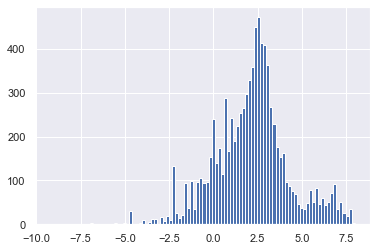

In [21]:
chembl['Standard Value'].map(lambda x: np.log(x)).hist(bins=100)

In [22]:
chembl['value'] = chembl['Standard Value'].apply(lambda x: 0 if np.log(x) <=0 else 1)

In [23]:
chembl['value'].value_counts()

1    7398
0    1376
Name: value, dtype: int64

In [24]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation',
       'Standard Value', 'Standard Units', 'Assay ChEMBL ID',
       'Assay Description', 'Assay Type', 'BAO Format ID', 'BAO Label',
       'Document ChEMBL ID', 'Source Description', 'Document Journal',
       'Document Year', 'Cell Line Models', 'Temperature Conditions',
       'Permeability Assays', 'pH Levels',
       'Concentration and Dosing Parameters', 'Blood_Brain_Barrier',
       'Smiles_check', 'Smiles_removesalt', 'Smiles_unify', 'value'],
      dtype='object')

In [25]:
for experiment in [  'Cell Line Models', 'Temperature Conditions',
       'Permeability Assays', 'pH Levels',
       'Concentration and Dosing Parameters', 'Blood_Brain_Barrier']:
    display(chembl[experiment].value_counts(dropna=False))

PAMPA                               3871
Caco2                               1145
PAMPA-BBB                            955
Caco-2                               394
human Caco2                          309
                                    ... 
human Caco2/TC7 UPLC/ESI-MS-MS         1
PAMPA pH 6.8                           1
pig LLC-PK1 human MDR1                 1
artificial membrane permeability       1
PAMPA PBS/EtOH                         1
Name: Cell Line Models, Length: 107, dtype: int64

NaN        8716
37 degC      30
25 degC      28
Name: Temperature Conditions, dtype: int64

NaN                                                      6086
apical to basolateral                                    1509
basolateral to apical                                     536
passive permeability                                       39
basal to apical                                            34
                                                         ... 
permeability assessment 50 uM 2 hrs                         1
basolateral to apical permeability in MDR1 expression       1
permeability at 10 uM at pH 7.4                             1
passive apical to basolateral permeability                  1
across apical to basolateral side pH 7.4                    1
Name: Permeability Assays, Length: 97, dtype: int64

NaN                               6466
7.4                               1653
4.0                                140
6.5                                100
5.0                                 63
7.4 PBS                             61
7.4 PBS/EtOH (7:3)                  58
7.4 PBS/EtOH                        41
6.2                                 40
PBS/EtOH (70:30)                    29
5.5                                 26
6.5 to 7.4                          19
pH 7.4                              18
PBS/EtOH                            12
donor 5.0 and acceptor 7.4           8
donor 6.2 and acceptor 7.4           7
3.0                                  6
basolateral 6.5 to apical 7.4        5
donor 7.4 and acceptor 7.4           4
apical 6.5 and basolateral 7.4       4
pH 5.0                               3
donor and acceptor 7.4               3
pH 6.5 to 7.4                        2
pH 6 to 7.4                          2
7.4 HBSS                             2
5 to 7.4                 

NaN                       5801
10 uM                      223
25 ug/ml after 18 hrs      169
after 30 mins              140
100 ug/ml after 10 hrs     125
                          ... 
50 uM at pH 7.4              1
100 uM in PBS pH 7.4         1
20 uM for 120 mins           1
5 uM after 5 hrs             1
pH 5.0 and 7.4 buffer        1
Name: Concentration and Dosing Parameters, Length: 172, dtype: int64

False    7510
True     1090
NaN       174
Name: Blood_Brain_Barrier, dtype: int64

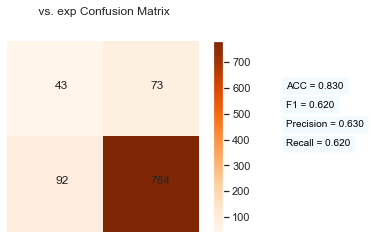

In [28]:
plot_classification_diagram(chembl,['Smiles_unify'], 'value')

In [30]:
chembl['Cell Line Models'] = chembl['Cell Line Models'].fillna('unknown')
chembl = chembl[chembl['Cell Line Models'].apply(lambda x: x.lower()).str.contains('bbb')]
chembl['Cell Line Models'].value_counts()

PAMPA-BBB                        955
PAMPA-BBB PBS/EtOH                45
BBB-PAMPA                         29
PAMPA BBB                         25
PAMPA-BBB PVDF membrane            9
PAMPA-BBB HPLC-UV                  6
PAMPA-BBB UV                       5
PAMPA-BBB porcine brain lipid      3
Name: Cell Line Models, dtype: int64

In [31]:
chembl['Temperature Conditions'] = chembl['Temperature Conditions'].fillna('unknown')
chembl['Temperature Conditions'].value_counts()

unknown    1077
Name: Temperature Conditions, dtype: int64

In [32]:
chembl['Permeability Assays'] = chembl['Permeability Assays'].fillna('unknown')
chembl = chembl[~chembl['Permeability Assays'].apply(lambda x: x.lower()).str.contains('effective permeability')]
chembl['Permeability Assays'].value_counts()

unknown                                       974
compound dilution permeability                 21
dissolved in PBS/EtOH mixture permeability     20
permeability after dilution with PBS/EtOH      20
BBB assay                                      20
PAMPA-BBB                                       5
passive permeability                            4
diffusion porcine brain lipid                   3
BBB permeability                                3
Name: Permeability Assays, dtype: int64

In [33]:
chembl['pH Levels'] = chembl['pH Levels'].fillna('unknown')
chembl['pH Levels'].value_counts()

unknown                   651
7.4                       209
7.4 PBS                    61
7.4 PBS/EtOH (7:3)         58
7.4 PBS/EtOH               41
PBS/EtOH (70:30)           29
PBS/EtOH                   12
pH 7.4                      6
donor and acceptor 7.4      3
Name: pH Levels, dtype: int64

In [34]:
chembl['Concentration and Dosing Parameters'] = chembl['Concentration and Dosing Parameters'].fillna('unknown')
chembl['Concentration and Dosing Parameters'].value_counts()

unknown                                   299
25 ug/ml after 18 hrs                      92
incubated for 18 hrs                       87
100 ug/ml after 18 hrs                     61
after 16 hrs                               53
after 18 hrs                               42
100 ug/ml after 10 hrs                     34
1 mg/ml after 4 hrs                        28
in PBS/EtOH (7:3)                          24
after dilution in PBS/EtOH                 21
100 ug/ml after 12 hrs                     19
dissolved in PBS/EtOH (80:20)              18
5 mg/ml after 18 hrs                       18
25 ug/ml incubated for 16 hrs              16
100 ug/ml after 16 hrs                     16
after 2 hrs and 30 mins                    15
50 ug/ml in PBS:EtOH                       15
100 uM after 60 mins                       13
25 ug/ml                                   13
incubated for 10 hrs                       13
after 240 mins                             13
100 ug/ml by PAMPA-BBB            

In [35]:
chembl['Blood_Brain_Barrier'] = chembl['Blood_Brain_Barrier'].fillna(False)

chembl = chembl[chembl['Blood_Brain_Barrier']]


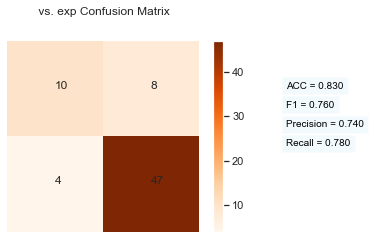

In [36]:
plot_classification_diagram(chembl,['Smiles_unify','Concentration and Dosing Parameters'], 'value')

In [37]:
chembl = chembl[['Smiles','value','Assay ChEMBL ID']]
chembl['property'] = 'bbb'

In [38]:
chembl.columns = ['Smiles','value','source','property']

In [39]:
chembl[chembl['value'].isna()]

,Smiles,value,source,property


<AxesSubplot:>

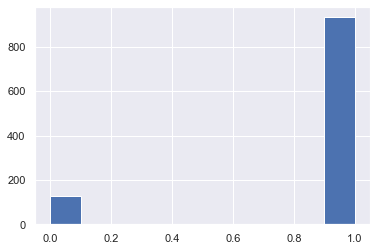

In [40]:
chembl['value'].hist()

## B3DB

In [45]:
cls_b3db_df = pd.read_table('../data/raw_data/bbb/classification_extended_test.tsv')

/Users/xiangluxiao/opt/anaconda3/envs/rdkit/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
cls_b3db_df

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,VE3_A,...,MWC05,MWC06,MWC07,MWC08,MWC09,MWC10,TMWC10,SRW02,SRW03,SRW04,SRW05,SRW06,SRW07,SRW08,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN,21.716720,16.307343,1,0,35.289886,2.380530,4.761059,35.289886,1.260353,4.249578,4.471033,0.159680,2.527239,...,7.512618,8.382289,9.229849,10.100328,10.950649,11.821814,133.447165,4.110874,0.0,5.433722,0.000000,6.946014,0.000000,8.538759,0.000000,10.171643,63.201012,398.068491,9.477821,2428,42,144,165,9.590278,6.097222
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN,27.965103,22.915028,4,0,45.430282,2.648849,5.297577,45.430282,1.261952,4.519812,4.024851,0.111801,2.673422,...,8.005367,8.942330,9.872358,10.817355,11.757196,12.708831,155.628995,4.369448,0.0,5.765191,2.397895,7.379632,4.595120,9.103979,6.529419,10.893010,87.033695,520.101247,9.287522,4114,62,194,237,13.756944,7.916667
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN,10.065904,8.927318,0,0,16.678194,2.425683,4.851365,16.678194,1.282938,3.505118,3.363390,0.258722,1.475314,...,6.857514,7.745436,8.628198,9.516280,10.400164,11.288093,96.742426,3.367296,0.0,4.691348,0.000000,6.244167,0.000000,7.904335,0.000000,9.618402,44.825548,304.910439,16.939469,218,21,68,81,4.805556,2.861111
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN,13.503979,11.612996,0,3,23.641772,2.237342,4.474683,23.641772,1.244304,3.806689,3.290631,0.173191,1.832933,...,6.734592,7.523481,8.305731,9.097060,9.882417,10.675330,105.772026,3.663562,0.0,4.844187,0.000000,6.216606,0.000000,7.684784,0.000000,9.201199,50.610337,341.030979,9.743742,898,22,82,88,6.583333,4.694444
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN,27.006116,19.957433,1,1,43.435426,2.709582,5.329713,43.435426,1.316225,4.477453,4.332407,0.131285,2.660046,...,8.159089,9.132054,10.103854,11.081912,12.059224,13.040978,153.299550,4.343805,0.0,5.771441,2.397895,7.415175,4.948760,9.171288,7.309881,10.992336,85.350582,461.168581,7.686143,2850,74,198,254,11.229167,6.847222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,7803,antazoline,"n-benzyl-n-(4,5-dihydro-1h-imidazol-2-ylmethyl...",c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,2200.0,NaN,BBB-,InChI=1S/C17H19N3/c1-3-7-15(8-4-1)13-20(14-17-...,NaN,R14|R23|R50|,D,NaN,15.515909,12.987974,0,2,26.938755,2.326623,4.635214,26.938755,1.346938,3.923960,4.106193,0.205310,2.105644,...,7.082549,7.921898,8.756053,9.599066,10.436847,11.281510,113.373744,3.806662,0.0,5.056246,2.397895,6.496775,4.442651,8.018625,6.259581,9.582249,66.060685,265.157898,6.798920,829,24,100,113,4.444444,4.527778
7803,7804,emedastine,"1-(2-ethoxyethyl)-2-(4-methyl-1,4-diazepan-1-y...",CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,3219.0,NaN,BBB+,InChI=1S/C17H26N4O/c1-3-22-14-13-21-16-8-5-4-7...,NaN,R15|R23|R50|,D,NaN,16.918192,13.952862,0,1,28.885493,2.483200,4.768669,28.885493,1.312977,4.018574,3.811754,0.173262,2.126547,...,7.320527,8.2103

<AxesSubplot:>

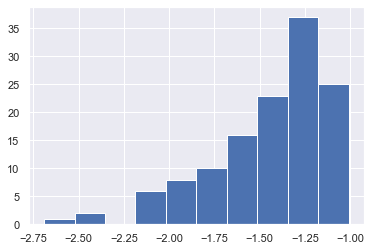

In [47]:
cls_b3db_df[cls_b3db_df['BBB+/BBB-'] == 'BBB-']['logBB'].hist()

<AxesSubplot:>

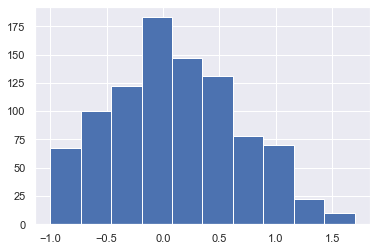

In [48]:
cls_b3db_df[cls_b3db_df['BBB+/BBB-'] == 'BBB+']['logBB'].hist()

In [49]:
cls_b3db_df.columns

Index(['NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'logBB',
       'BBB+/BBB-', 'Inchi', 'threshold', 'reference',
       ...
       'SRW10', 'TSRW10', 'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2',
       'mZagreb1', 'mZagreb2'],
      dtype='object', length=1625)

In [50]:
cls_b3db_df = cls_b3db_df[['NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'logBB','BBB+/BBB-', 'Inchi', 'threshold', 'reference','group','comments']]

In [51]:
cls_b3db_df['BBB_Class'] =cls_b3db_df['BBB+/BBB-'].apply(lambda x:0 if x == 'BBB-' else 1)

In [52]:
# cls_b3db_df['BBB_Class'] =cls_b3db_df['logBB'].apply(lambda x:0 if x <= -1 else 1)

In [53]:
cls_b3db_df = cls_b3db_df[cls_b3db_df['SMILES'].notna()]

In [54]:
cls_b3db_df.shape

(7807, 13)

In [55]:
cls_b3db_df['source'] = 'B3DB'

In [56]:
cls_b3db_df = cls_b3db_df[['SMILES','BBB_Class','source']]

In [57]:
cls_b3db_df['property'] = 'bbb'

In [58]:
cls_b3db_df.columns = ['Smiles','value','source','property']

In [59]:
cls_b3db_df['value'].value_counts()

1    4956
0    2851
Name: value, dtype: int64

### TDC

In [60]:
bbb_martin = pd.read_csv('../data/raw_data/bbb/bbb_martins.tab',delimiter='\t')
bbb_adenot = pd.read_csv('../data/raw_data/bbb/bbb_adenot.tab',delimiter='\t')

In [61]:
bbb_martin

,Drug_ID,Drug,Y
0,Propanolol,CC(C)NCC(O)COc1cccc2ccccc12.[Cl],1
1,Terbutylchlorambucil,CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1,1
2,40730,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,1
3,24,CC(=O)NCCCOc1cccc(CN2CCCCC2)c1,1
4,cloxacillin,Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...,1
...,...,...,...
2034,licostinel,O=c1[nH]c2cc(Cl)c(Cl)c([N+](=O)[O-])c2[nH]c1=O,1
2035,ademetionine(adenosyl-methionine),C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,1
2036,mesocarb,CC(Cc1ccccc1)n1cc([N-]C(=O)Nc2ccccc2)[o+]n1,1
2037,tofisoline,CCc1c(C)[n+]([NH-])c(-c2ccc(OC)c(OC)c2)c2cc(OC...,1


In [62]:
bbb_adenot

,Drug_ID,Drug,Y
0,12dichlorotetrafluoroethane (cryofluorane),FC(F)(Cl)C(F)(F)Cl,1
1,2methylthiophencyclidine (gacyclidine),C[C@H]1CCCC[C@]1(c1cccs1)N1CCCCC1,1
2,7amphetaminoethyltheophylline (fenetylline),C[C@@H](Cc1ccccc1)NCCn1cnc2c1c(=O)n(C)c(=O)n2C,1
3,acaprazine,CC(=O)NCCCN1CCN(c2cc(Cl)ccc2Cl)CC1,1
4,acebrochol,CC(=O)O[C@@H]1CC[C@@]2(C)[C@H]3CC[C@]4(C)[C@@H...,1
...,...,...,...
1576,sanfetrinem,CO[C@H]1CCC[C@H]2C1=C(C=O)N1C(=O)[C@H]([C@@H](...,-1
1577,tamoxifen,CC/C(=C(/c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,-1
1578,temocillin,CO[C@@]1(NC(=O)[C@@H](C(=O)O)c2ccsc2)C(=O)N2[C...,-1
1579,tetracycline,CN(C)[C@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C3...,-1


In [63]:
bbb_adenot['source'] = 'TDC_adenot'
bbb_martin['source'] = 'TDC_martin'

In [64]:
bbb_tdc_df = pd.concat([bbb_martin,bbb_adenot])

# bbb_tdc_df.rename(columns = {'Y':'BBB_Class'},inplace = True)

In [65]:
bbb_tdc_df['value'] = bbb_tdc_df['Y'].apply(lambda x : 0 if x == -1 else 1)

In [66]:
bbb_tdc_df = bbb_tdc_df[['Drug','value','source']]
bbb_tdc_df['property'] = 'bbb'

In [67]:
bbb_tdc_df.columns = ['Smiles','value','source','property']

In [68]:
bbb_tdc_df.shape,bbb_tdc_df['value'].value_counts()

((3620, 4),
 1    3311
 0     309
 Name: value, dtype: int64)

## Cleaning

In [69]:
bbb_df = pd.concat([cls_b3db_df,chembl,bbb_tdc_df,])

In [70]:
bbb_df['value'].value_counts(dropna = False)

1    9200
0    3288
Name: value, dtype: int64

In [71]:
bbb_df['source'].nunique(), bbb_df.shape

(92, (12488, 4))

In [72]:
bbb_df['source'].value_counts()

B3DB             7807
TDC_martin       2039
TDC_adenot       1581
CHEMBL4408525      34
CHEMBL4198351      33
                 ... 
CHEMBL5133683       2
CHEMBL4669395       2
CHEMBL4686703       1
CHEMBL5128450       1
CHEMBL4724699       1
Name: source, Length: 92, dtype: int64

In [73]:
bbb_df

,Smiles,value,source,property
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,0,B3DB,bbb
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,0,B3DB,bbb
2,Oc1c(I)cc(Cl)c2cccnc12,0,B3DB,bbb
3,CCNC(=NCCSCc1ncccc1Br)NC#N,0,B3DB,bbb
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,0,B3DB,bbb
...,...,...,...,...
1576,CO[C@H]1CCC[C@H]2C1=C(C=O)N1C(=O)[C@H]([C@@H](...,0,TDC_adenot,bbb
1577,CC/C(=C(/c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,0,TDC_adenot,bbb
1578,CO[C@@]1(NC(=O)[C@@H](C(=O)O)c2ccsc2)C(=O)N2[C...,0,TDC_adenot,bbb
1579,CN(C)[C@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C3...,0,TDC_adenot,bbb


In [74]:
bbb_df = process_stage_1(bbb_df,'Smiles')

[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] Explicit valence for atom # 8 C greater than permitted
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not removing hydrogen atom without neighbors
[15:51:51] WARNING: not 

SANITIZE_NONE    12486
Name: Smiles_check, dtype: int64


100%|████████████████████████████████████| 12486/12486 [00:00<00:00, 1201010.89it/s]
12486it [00:12, 1020.60it/s]


Metal in Smiles amount: 0


100%|██████████████████████████████████████| 12486/12486 [00:00<00:00, 13281.67it/s]


In [75]:
bbb_df = bbb_df[['Smiles_unify','Smiles','value','source','property']]

In [76]:
bbb_df = bbb_df[bbb_df['value'].isin([0,1])]

In [77]:
bbb_df

,Smiles_unify,Smiles,value,source,property
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,0,B3DB,bbb
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,0,B3DB,bbb
2,Oc1c(I)cc(Cl)c2cccnc12,Oc1c(I)cc(Cl)c2cccnc12,0,B3DB,bbb
3,CCNC(=NCCSCc1ncccc1Br)NC#N,CCNC(=NCCSCc1ncccc1Br)NC#N,0,B3DB,bbb
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,0,B3DB,bbb
...,...,...,...,...,...
1576,CO[C@H]1CCC[C@H]2C1=C(C=O)N1C(=O)[C@H]([C@@H](...,CO[C@H]1CCC[C@H]2C1=C(C=O)N1C(=O)[C@H]([C@@H](...,0,TDC_adenot,bbb
1577,CC/C(=C(/c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,CC/C(=C(/c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,0,TDC_adenot,bbb
1578,CO[C@@]1(NC(=O)[C@@H](C(=O)O)c2ccsc2)C(=O)N2[C...,CO[C@@]1(NC(=O)[C@@H](C(=O)O)c2ccsc2)C(=O)N2[C...,0,TDC_adenot,bbb
1579,CN(C)[C@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C3...,CN(C)[C@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C3...,0,TDC_adenot,bbb


In [79]:
bbb_df.to_csv('../data/data_processing_result/bbb_preprocessing_finished.csv',index=False)